In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os 
import cv2 
import sklearn 
import keras
import tensorflow as tf


In [2]:
import pathlib 
pneumonia_dir = pathlib.Path("chest_xray/chest_xray/PNEUMONIA")
normal_dir = pathlib.Path("chest_xray/chest_xray/NORMAL")

In [3]:
dirlist=[pneumonia_dir,normal_dir ]
classes=['No', 'yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels)) 

filepaths:  5856    labels:  5856


In [4]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(5856,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,chest_xray\chest_xray\PNEUMONIA\person1000_bac...,No
1,chest_xray\chest_xray\PNEUMONIA\person1000_vir...,No
2,chest_xray\chest_xray\PNEUMONIA\person1001_bac...,No
3,chest_xray\chest_xray\PNEUMONIA\person1002_bac...,No
4,chest_xray\chest_xray\PNEUMONIA\person1003_bac...,No


In [5]:
print(df['labels'].value_counts())

labels
No     4273
yes    1583
Name: count, dtype: int64


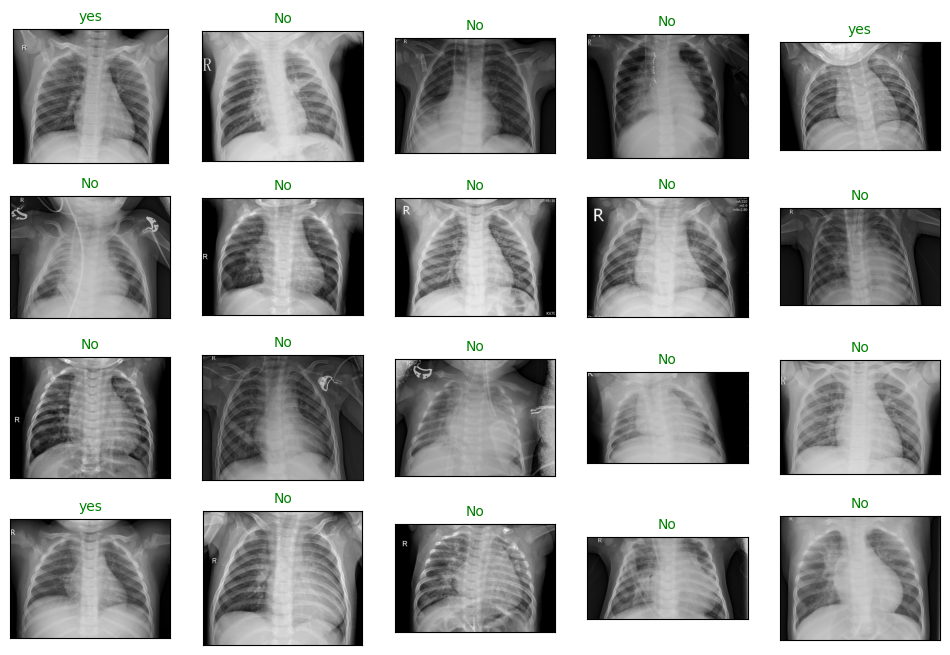

In [6]:
plt.figure(figsize=(12,8))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 10, color = "green") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [7]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
import glob
images_dict = {
    'pnuemonia': list(pneumonia_dir.glob('*')) ,   
    'normal': list(normal_dir.glob('*'))  
}

labels_dict = {
    'pnuemonia': "pnuemonia",
    'normal': "normal",
    
}

In [9]:
import tensorflow as tf

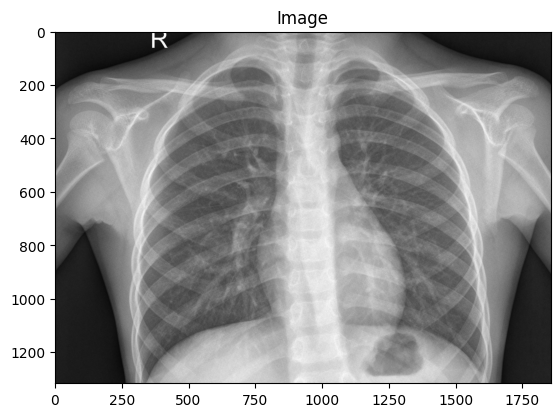

In [10]:
# import cv2
# import matplotlib.pyplot as plt

# img = cv2.imread(str(images_dict['normal'][0]))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# plt.imshow(img)
# plt.title('Image')
# plt.show()


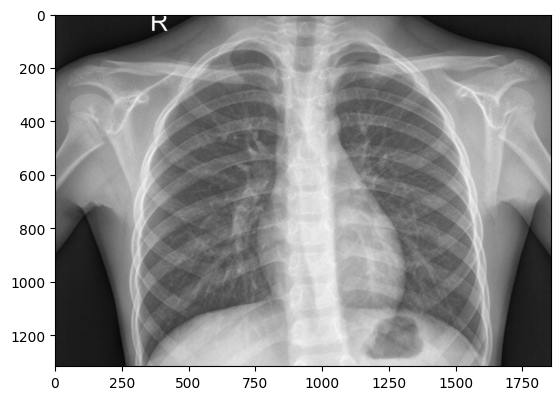

In [17]:
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img = cv2.imread(str(images_dict['normal'][0]))
plt.imshow(img)

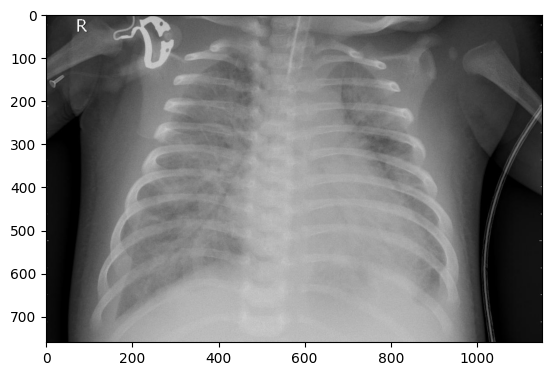

In [20]:
img2 = cv2.imread(str(images_dict['pnuemonia'][0]))
plt.imshow(img2)

In [18]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=str(image)
     
        #resize_img=cv2.resize(img)
       
        X.append(img)
        y.append(labels_dict[name])

In [21]:
Fseries = pd.Series(X, name="filepaths",dtype=str)
Lseries = pd.Series(y, name="labels",dtype=str)
pneumonia_data = pd.concat([Fseries,Lseries], axis=1)
pneumonia_df = pd.DataFrame(pneumonia_data)

print(pneumonia_df.head())
print("---------------------")
print(pneumonia_df["labels"].value_counts())

                                           filepaths     labels
0  chest_xray\chest_xray\PNEUMONIA\person1000_bac...  pnuemonia
1  chest_xray\chest_xray\PNEUMONIA\person1000_vir...  pnuemonia
2  chest_xray\chest_xray\PNEUMONIA\person1001_bac...  pnuemonia
3  chest_xray\chest_xray\PNEUMONIA\person1002_bac...  pnuemonia
4  chest_xray\chest_xray\PNEUMONIA\person1003_bac...  pnuemonia
---------------------
labels
pnuemonia    4273
normal       1583
Name: count, dtype: int64


In [22]:
pneumonia_df.shape

(5856, 2)

In [23]:
#splitting data
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(pneumonia_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(pneumonia_df, test_size=0.2, random_state=42)

In [24]:
#shape of splitted data
print(train_images.shape) 
print(test_images.shape)
print(train_set.shape)
print(val_set.shape)

(4099, 2)
(1757, 2)
(4684, 2)
(1172, 2)
